# Question 3: Random Forest Algorithm

### Importing of Libraries

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading of the data set into a dataframe

In [298]:
df = pd.read_csv('telescope_data.csv')
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### 1. Performing Exploratory Data Analysis 

#### Noting the Shape: We examine the shape of our dataset. Noting all the different attributes.

In [299]:
df.shape

(19020, 12)

In [300]:
df.columns

Index(['Unnamed: 0', 'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
       'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

#### Summary information: We should first examine the complete dataset. This arrangement of information—from the big picture to the specifics—is crucial.

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


#### Missing Values: Here, we count the number of missing values. By combining the "isnull()" and "any()" functions in pandas, we can verify it.

In [302]:
pd.isnull(df).any()

Unnamed: 0    False
fLength       False
fWidth        False
fSize         False
fConc         False
fConc1        False
fAsym         False
fM3Long       False
fM3Trans      False
fAlpha        False
fDist         False
class         False
dtype: bool

#### Check Basic Descriptive Statistics values: In particular, it is important to pay close attention to the "mean" and "std."

In [303]:
df.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


#### Check the target's Histogram Distribution:

Text(0.5, 1.0, 'Class Counts')

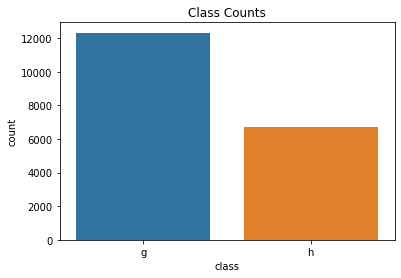

In [304]:
sns.countplot(x="class", data=df)
plt.title('Class Counts')


#### Plot a pairwise relationships in a dataset

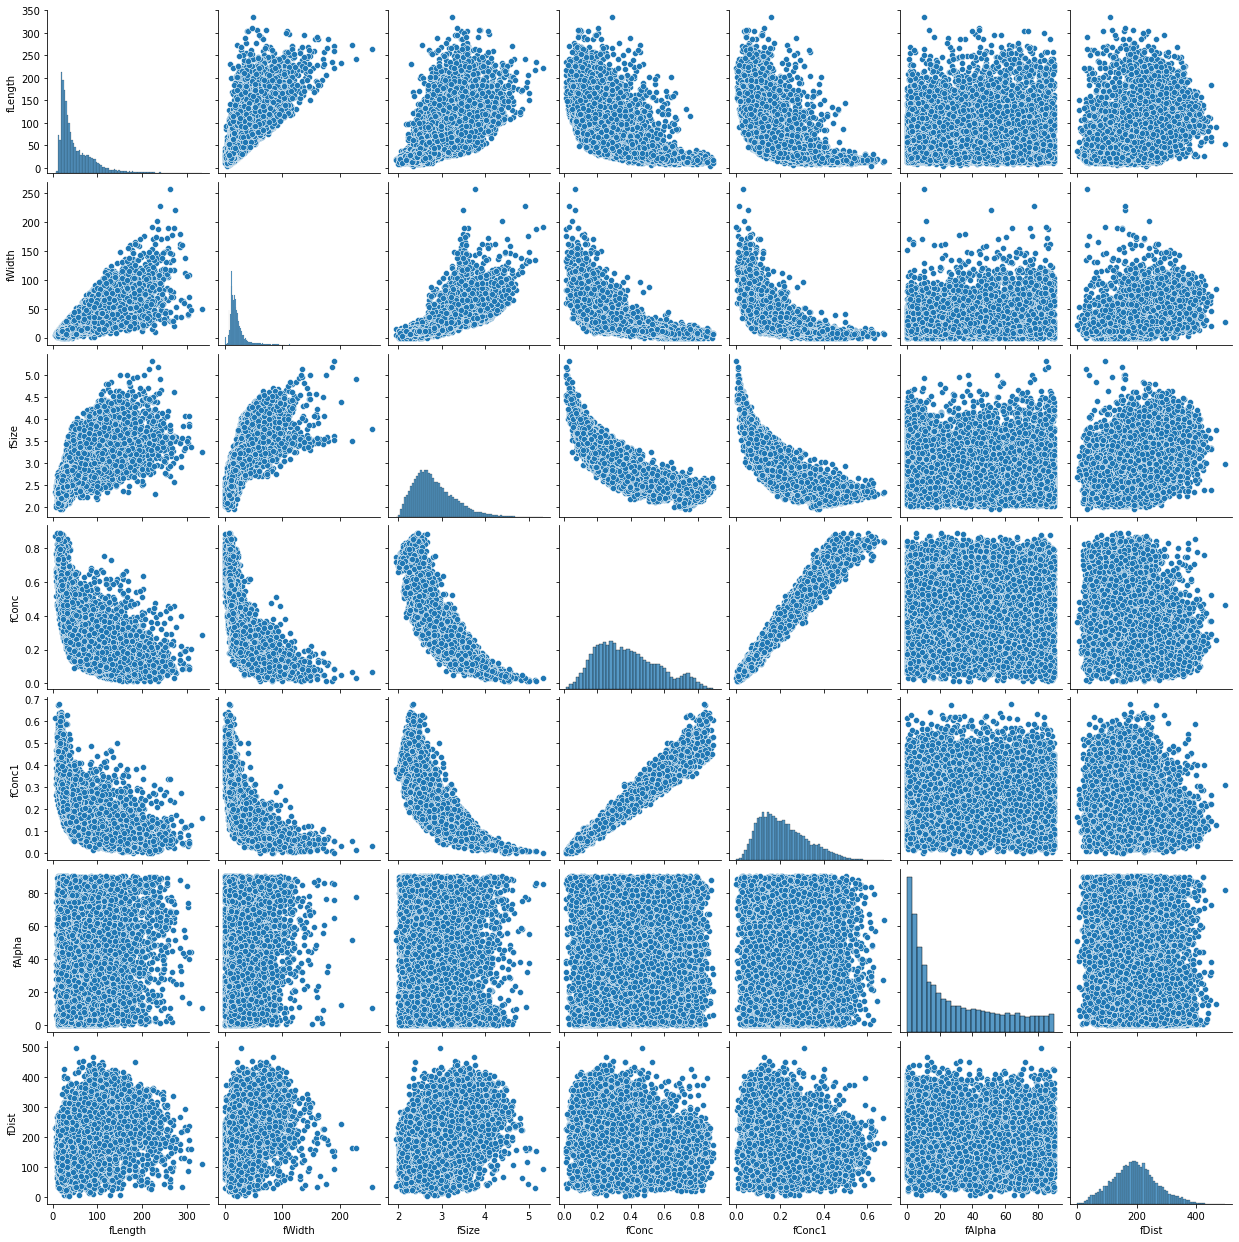

In [305]:
sns.pairplot(df[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAlpha','fDist']], diag_kind='hist')

#### Extract Seperate Statistics for each of the classes

In [306]:
g_df = df[df['class']=='g']
h_df = df[df['class']=='h']

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>,
        <AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>]],
      dtype=object)

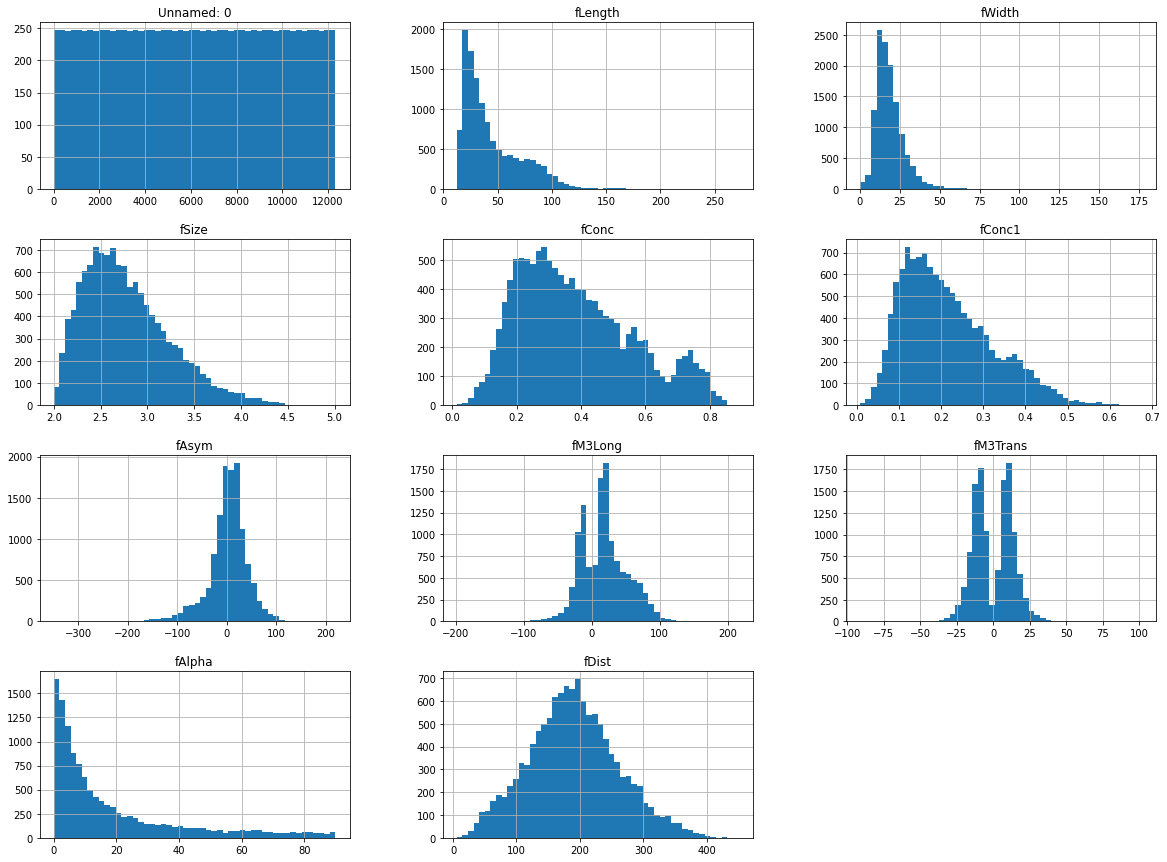

In [307]:
g_df.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>,
        <AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>]],
      dtype=object)

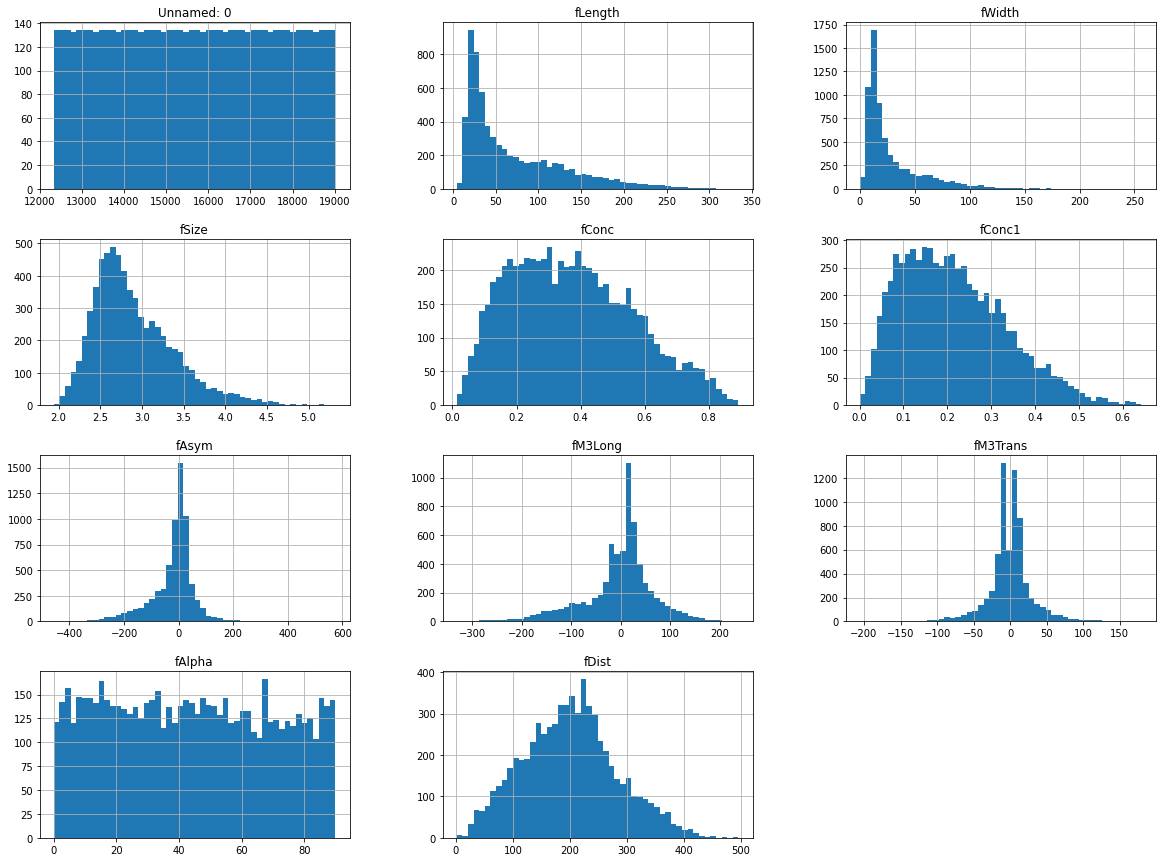

In [308]:
h_df.hist(bins=50, figsize=(20,15))

### 2. Setting up a Random Forest Classifier

In [309]:
X = df.drop(['class'],axis=1).values
y = df['class'].values

#### Encoding of the dependent variable

In [310]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

#### Scaling of the Features

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X  = sc.fit_transform(X)

#### Train and Test splitting of data

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train)
print(y_train)

[[-0.0621972  -0.64357994 -0.20290814 ...  0.71865137  1.09371203
  -0.04667516]
 [-0.20516879 -0.37115829 -0.02483249 ...  0.41270557 -0.77659877
  -0.69455573]
 [-1.00708464  0.13111557  0.6227406  ...  1.26507473 -0.87954505
  -0.7917057 ]
 ...
 [ 0.06110442 -0.41123738 -0.28812215 ...  0.53080769 -1.04102115
   0.5493118 ]
 [ 0.23485589 -0.78254547 -0.5076901  ...  0.36612636 -0.22873699
   0.24461417]
 [-1.23438216 -0.61320254 -0.5215463  ... -0.48737595 -0.91394731
  -0.11223132]]
[0 0 0 ... 0 0 0]


#### Finding of the optimal parameters of the model

In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def max_rand_forest_param():
    params =[]
    for j in range(1,100,5):
        for k in range(1,10,1):
            forest = RandomForestClassifier(n_estimators=j, max_depth=k,random_state=0,criterion='gini')
            forest.fit(X_train,y_train)
            pred = forest.predict(X_test)
            score = accuracy_score(y_test,pred)
            params.append((j,k,score))
    highest = max(params,key=lambda x:x[2])
    return highest

In [314]:
opt = max_rand_forest_param()
n_est, depth, param_score = opt
print("Optimal max_depth        : ", depth)
print("Optimal n_estimators     : ", n_est)

Optimal max_depth        :  1
Optimal n_estimators     :  1


#### Training the Model of Random Forest Classification with training set

In [315]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=n_est, max_depth=depth,random_state=0,criterion='gini')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=0)

#### Predictions and Evaluation

In [316]:
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [317]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[3079    0]
 [   0 1676]]


With this confusion matrix we find that all the test set were classified correctly. As there are no false positives or false negatives.As we can see this directly translate into a 100% accuracy of our model.

In [318]:
print("Accuracy of Optimal Random Forest: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of Optimal Random Forest: 100.00%


### Naive Bayes Model

In [319]:
from sklearn import naive_bayes, metrics
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.confusion_matrix(expected_y, predicted_y))

[[2692  387]
 [ 237 1439]]


In [320]:
print("Accuracy of Naive Bayes: {:.2f}%".format(model.score(X_test, y_test)*100))

Accuracy of Naive Bayes: 86.88%


### Comparison of Optimal Random Forest vs Naïve Bayes algorithm for Classification in this example

We can note that the model accuracy score of The Optimal Random Forest was perfect, with no wrong classifications. While, on the otherhand, Naïve Bayes algorithm provided us with almost an 87% success rate. This means that after performing exploratory data analysis and pre-processing on this dataset, we trained the Random Forest and determined the ideal settings such that it performs better than the Nave Bayes algorithm.